In [1]:
import sys
sys.path.append('../scripts')

In [2]:
from eda import load_data, merge_data, check_missing_values, handle_missing_values, detect_outliers, cap_outliers, plot_sales_behavior, analyze_promo_effect, find_seasonal_behavior, analyze_store_opening_closing, analyze_promo_effectiveness_by_store, analyze_weekday_store_sales, analyze_assortment_type_effect_on_sales, analyze_competition_distance_effect_on_sales, analyze_city_center_store_sales, analyze_competitor_opening_effect, plot_sales_trends_around_competitor_opening

In [3]:
# Define the paths to your datasets
train_path = '../data/train.csv'
test_path = '../data/test.csv'
store_path = '../data/store.csv'

In [4]:
# Load data
train, test, store = load_data(train_path, test_path, store_path)

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:20: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


In [5]:
# Merge data
train_store, test_store = merge_data(train, test, store)

In [6]:
# Check for missing values
missing_train = check_missing_values(train_store, 'Train Store')
missing_test = check_missing_values(test_store, 'Test Store')
print(missing_train)
print(missing_test)

                           Missing Values  Percentage
Store                                   0    0.000000
DayOfWeek                               0    0.000000
Date                                    0    0.000000
Sales                                   0    0.000000
Customers                               0    0.000000
Open                                    0    0.000000
Promo                                   0    0.000000
StateHoliday                            0    0.000000
SchoolHoliday                           0    0.000000
StoreType                               0    0.000000
Assortment                              0    0.000000
CompetitionDistance                  2642    0.259730
CompetitionOpenSinceMonth          323348   31.787764
CompetitionOpenSinceYear           323348   31.787764
Promo2                                  0    0.000000
Promo2SinceWeek                    508031   49.943620
Promo2SinceYear                    508031   49.943620
PromoInterval               

In [7]:
# Handle missing values
handle_missing_values(train_store, test_store)

In [8]:
# Detect and handle outliers
outliers_sales = detect_outliers(train_store, 'Sales')
cap_outliers(train_store, 'Sales')

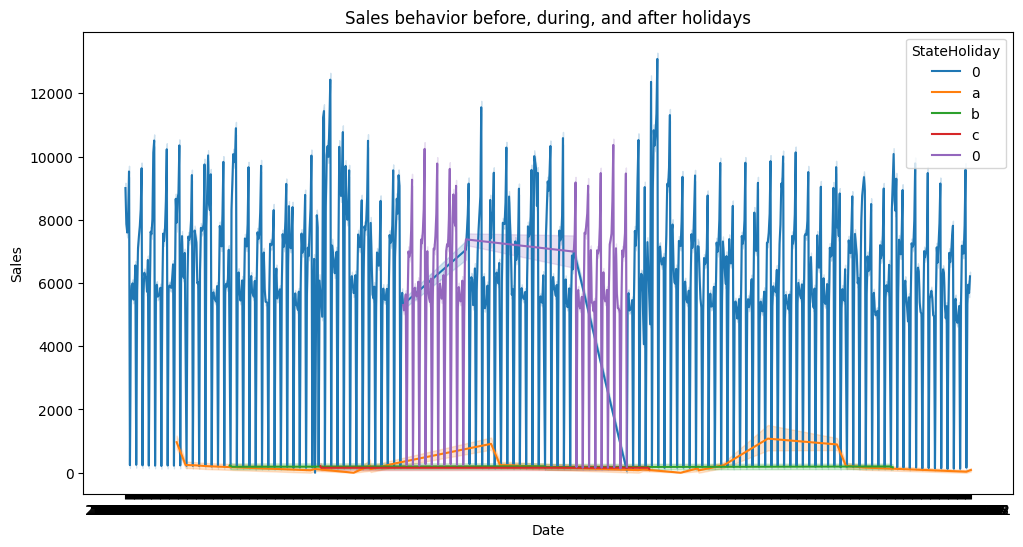

In [9]:
# Visualize sales behavior
plot_sales_behavior(train_store)

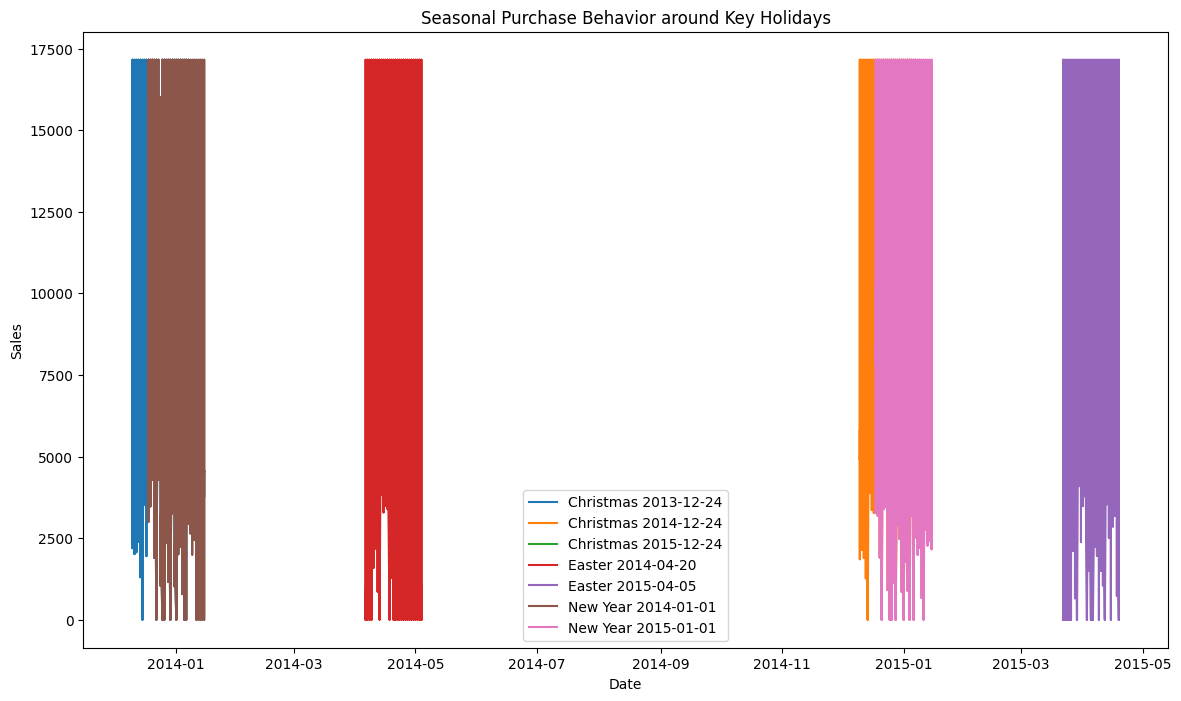

In [9]:
find_seasonal_behavior(train_store)

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=promo_sales, palette='viridis')


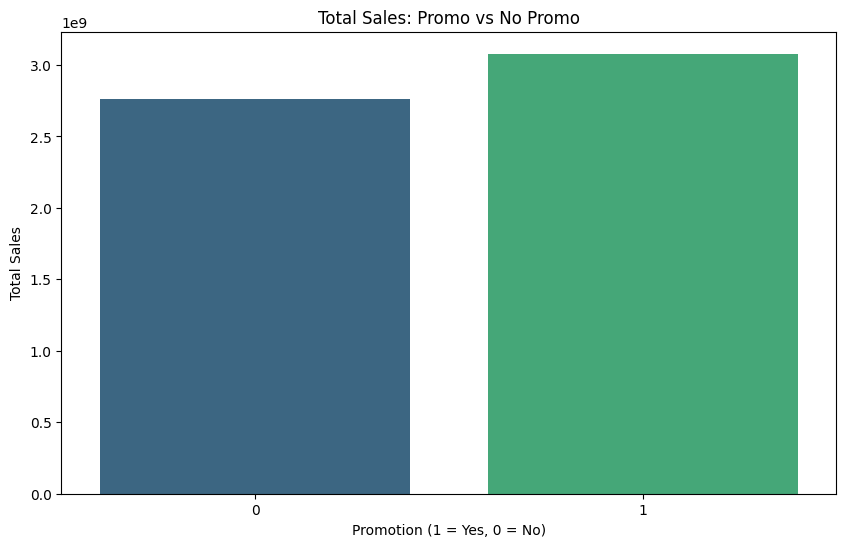

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Customers', data=promo_customers, palette='plasma')


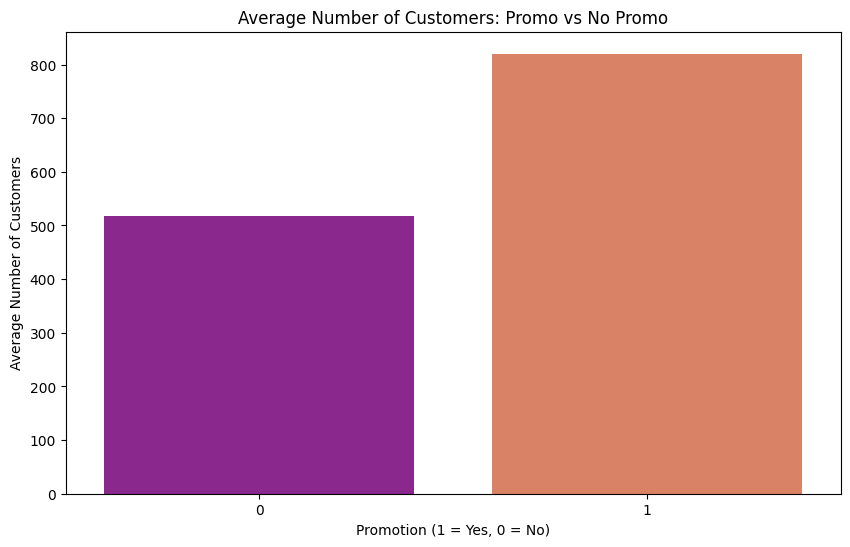

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales_per_Customer', data=promo_sales_per_customer, palette='coolwarm')


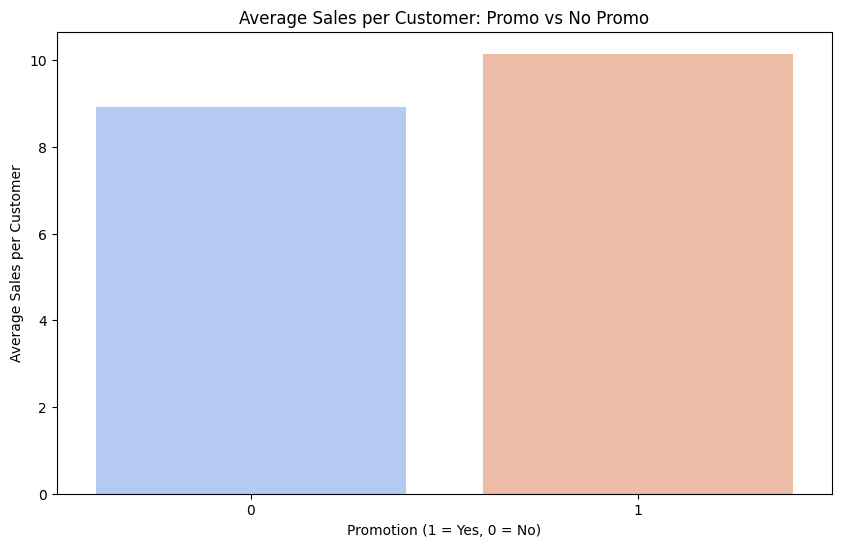

In [9]:
# Analyze promotion effect
analyze_promo_effect(train_store)

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Open', 'Closed'], y=[sales_open, sales_closed], palette='viridis')


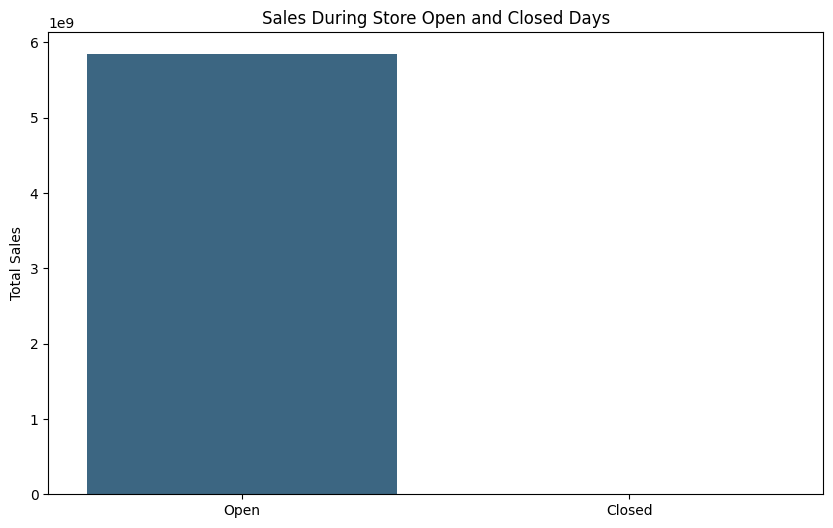

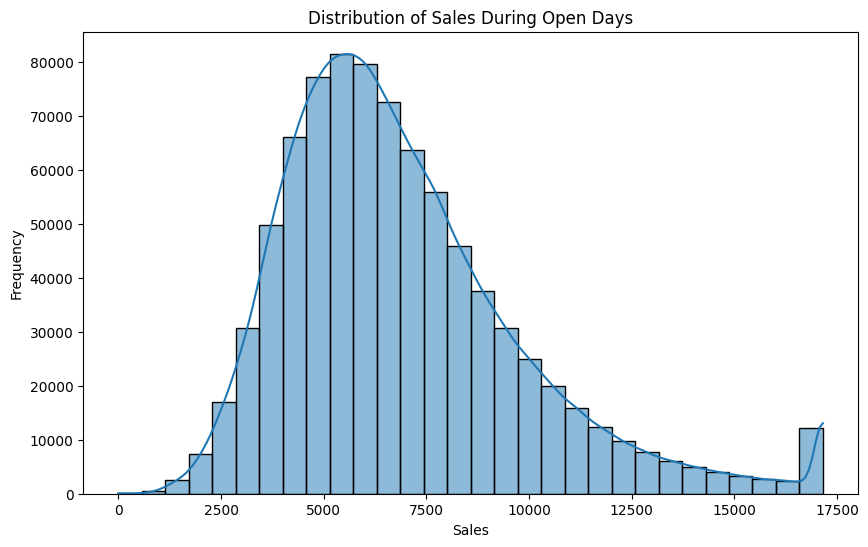

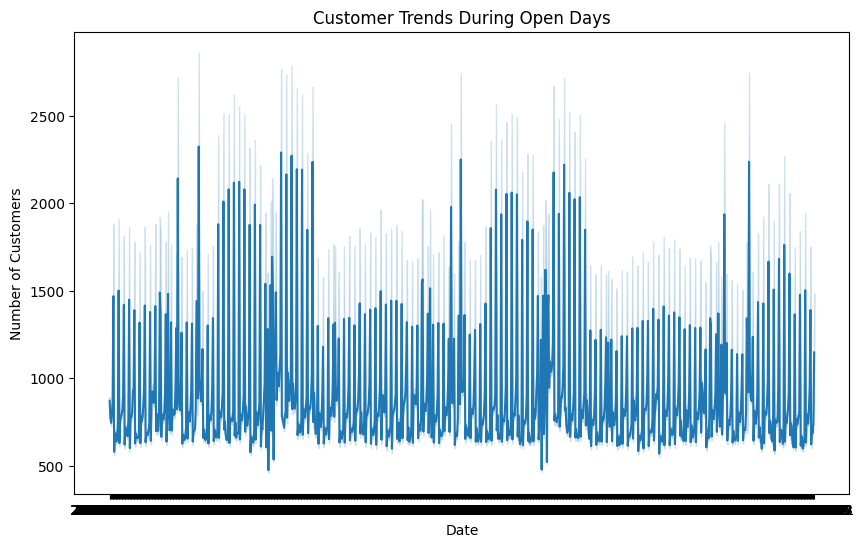

In [10]:
analyze_store_opening_closing(train_store)

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_boost_stores.index, y=promo_boost_stores['Promo_Difference'], palette='Blues_d')


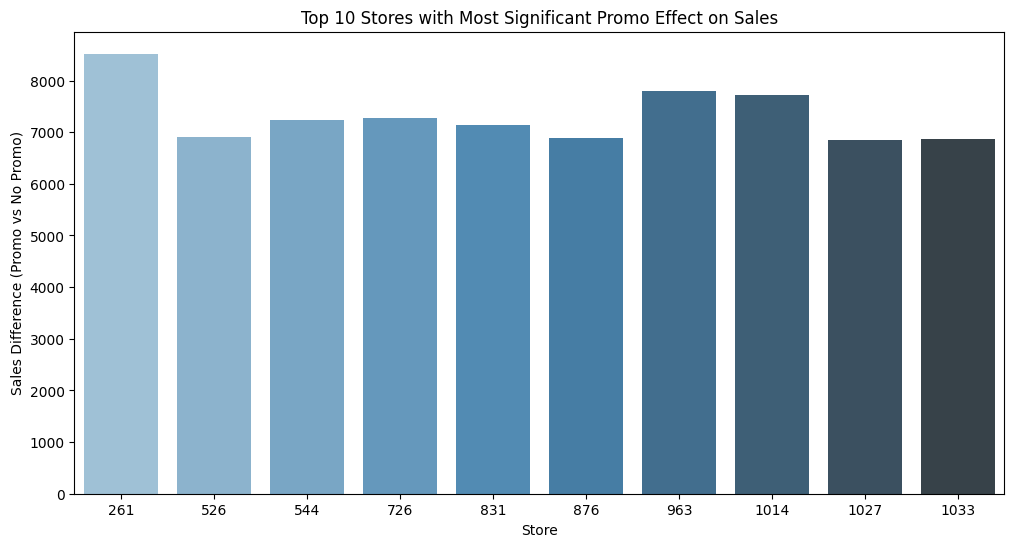

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_ineffective_stores.index, y=promo_ineffective_stores['Promo_Difference'], palette='Reds_d')


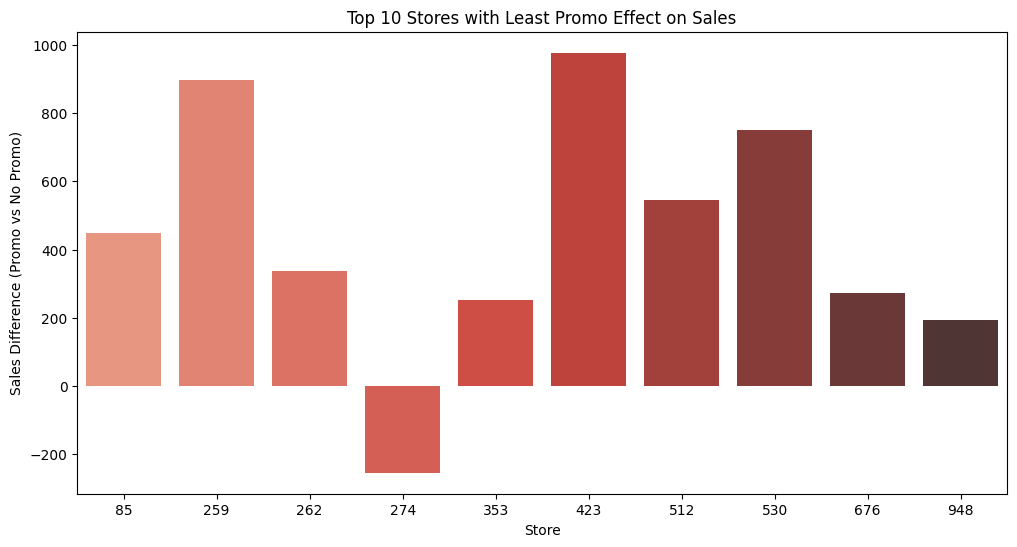

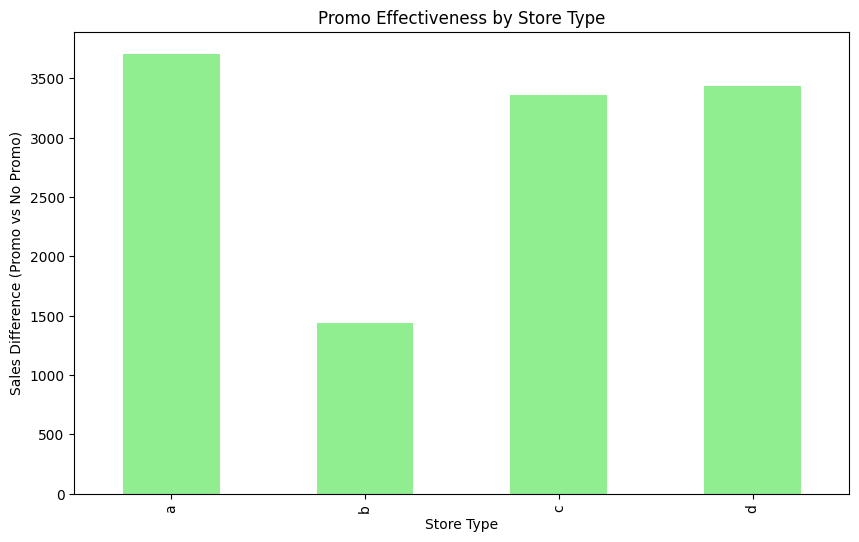

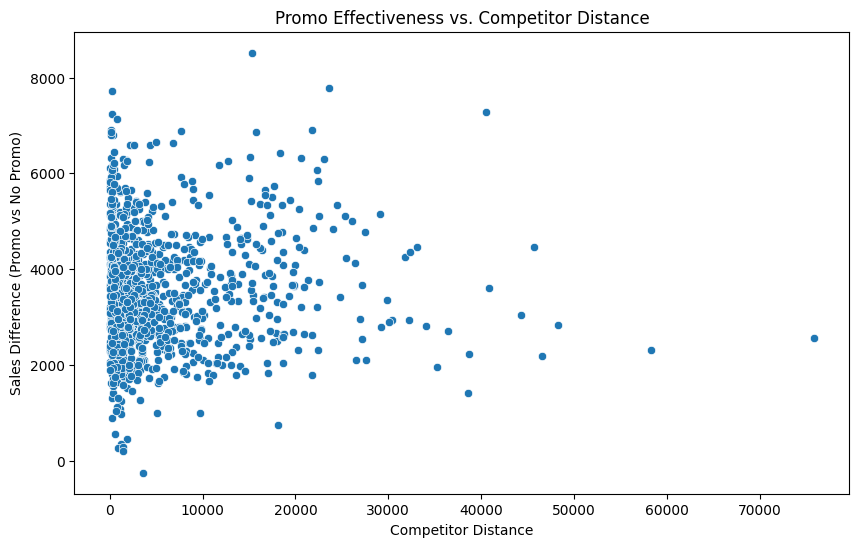

In [10]:
analyze_promo_effectiveness_by_store(train_store)

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['Store_Open_All_Weekdays'] = weekend_data['Store'].apply(lambda x: 1 if x in stores_open_all_weekdays else 0)
/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:307: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store_Open_All_Weekdays', y='Sales', data=avg_sales_weekend, palette='Set2')


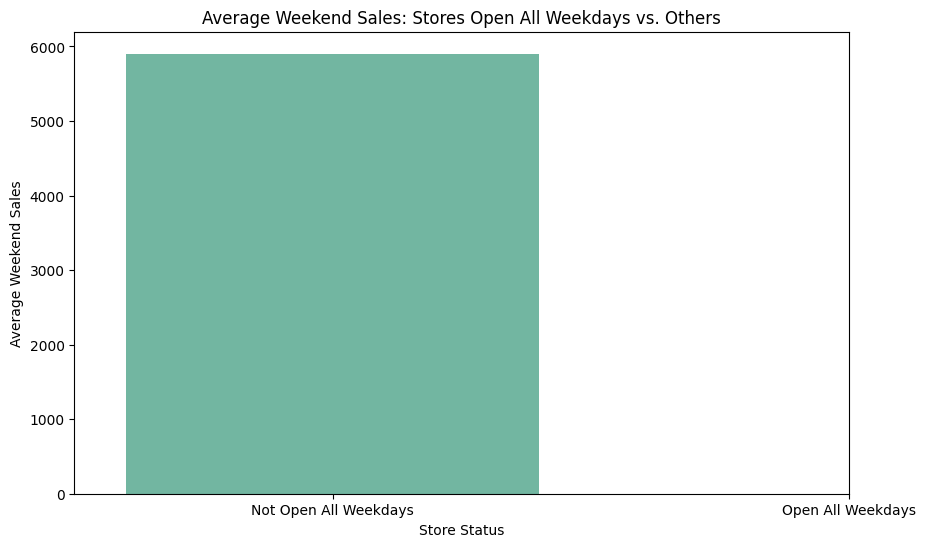

In [9]:
avg_weekend_sales = analyze_weekday_store_sales(train_store)

/home/kali/Desktop/vs/Pharmaceutical_store_sales/notebooks/../scripts/eda.py:316: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='Set2')


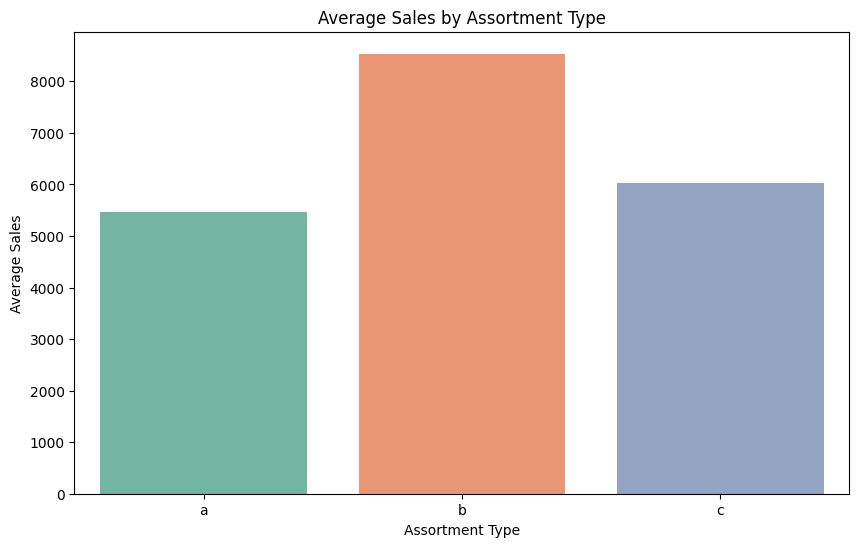

In [9]:
assortment_sales = analyze_assortment_type_effect_on_sales(train_store)

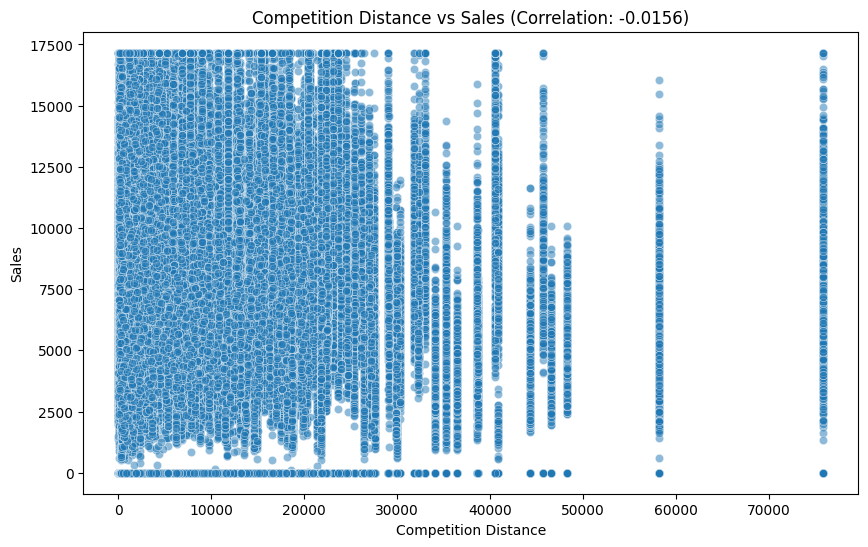

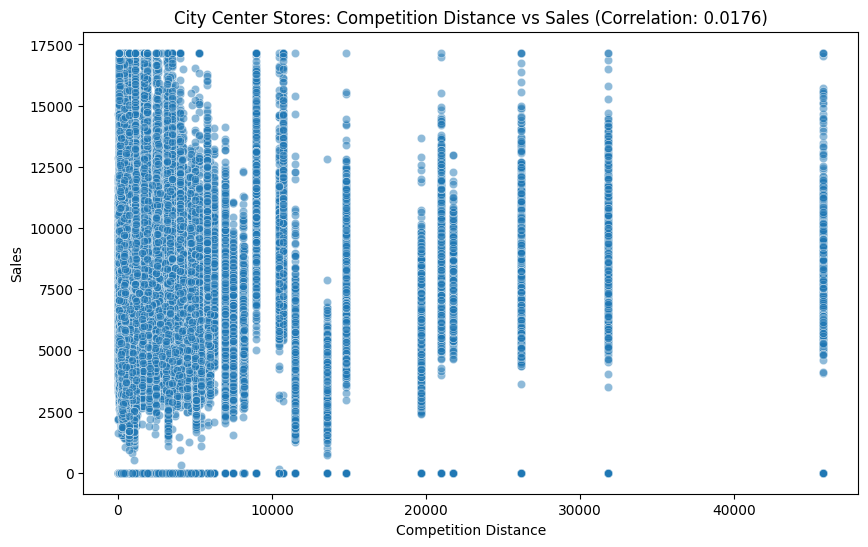

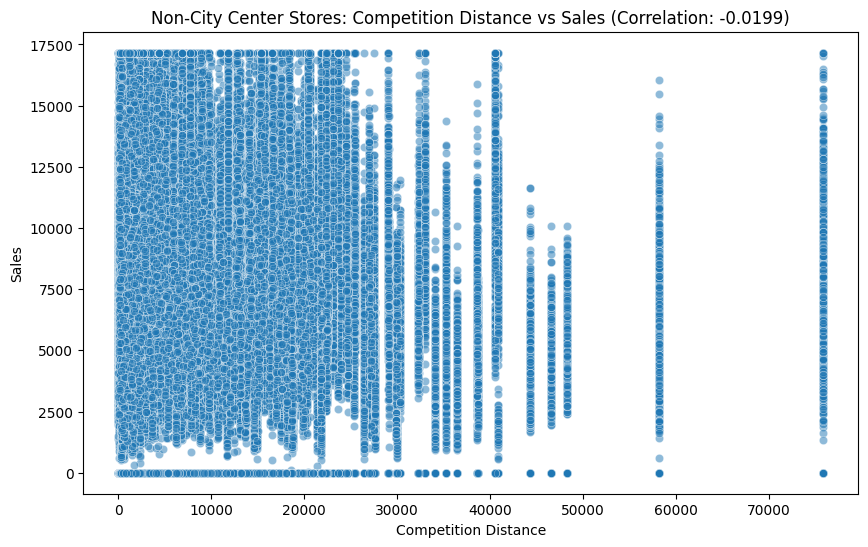

In [9]:
# Analyze the effect of competition distance on sales for all stores
correlation = analyze_competition_distance_effect_on_sales(train_store)

# Analyze the effect for city center stores vs non-city center stores
city_center_corr, non_city_center_corr = analyze_city_center_store_sales(train_store)